
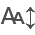

../data/raw/kaggle/input/playground-series-s4e4/train.csv
../data/raw/kaggle/input/playground-series-s4e4/test.csv
../data/raw/kaggle/input/playground-series-s4e4/sample_submission.csv


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics
import sklearn.model_selection

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False, connected=False)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

path='../data/raw/kaggle/input/playground-series-s4e4'

import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Features

https://archive.ics.uci.edu/dataset/1/abalone

- Sex	- M, F, and I (infant)
- Length - Longest shell measurement	mm
- Diameter - perpendicular to length	mm
- Height - with meat in shell	mm
- Whole_weight - whole abalone	grams
- Shucked_weight - weight of meat	grams
- Viscera_weight - gut weight (after bleeding)	grams
- Shell_weight - after being dried	grams
- Rings	Target - +1.5 gives the age in years

# Load data

In [2]:
df = pd.read_csv(f'{path}/train.csv')
df_test = pd.read_csv(f'{path}/test.csv')

show(df)
show(df_test)

# Drop some features

In [3]:
df = df.drop(['id'], axis=1)
# df_test = df_test.drop(['Sex'], axis=1) # id still needed later

display(df.head())
display(df_test.head())

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


# Set target feature

In [4]:
X = df.drop('Rings', axis=1)
y = df['Rings']

display(X.head())
display(y.head())

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


0    11
1    11
2     6
3    10
4     9
Name: Rings, dtype: int64

# Split off validation set for testing.

In [5]:
# https://medium.com/analytics-vidhya/stratified-sampling-in-machine-learning-f5112b5b9cfe

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    X, y,
    test_size=0.2,
    random_state=23,
    stratify=y # to keep Rings distribution between splits approximately the same
  )

display(X_train.head())
display(X_val.head())
display(y_train.head())
display(y_val.head())

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
14409,M,0.530,0.415,0.160,0.8665,0.2950,0.1835,0.2725
26687,I,0.575,0.440,0.140,0.8720,0.3155,0.1695,0.2400
5083,F,0.440,0.345,0.135,0.4510,0.1785,0.0810,0.1200
24822,I,0.325,0.225,0.075,0.1445,0.0515,0.0235,0.0450
86069,F,0.625,0.470,0.155,1.1000,0.4145,0.2035,0.2900


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
48052,M,0.580,0.455,0.155,1.1030,0.5175,0.2425,0.2950
24389,I,0.375,0.275,0.090,0.2345,0.1125,0.0555,0.0725
35942,M,0.720,0.575,0.165,1.7405,0.6805,0.3575,0.5800
24943,I,0.520,0.400,0.130,0.5825,0.2505,0.1365,0.1800
1296,F,0.550,0.475,0.180,0.8690,0.3035,0.1940,0.3200


14409    20
26687    13
5083     12
24822     6
86069    10
Name: Rings, dtype: int64

48052    11
24389     8
35942    14
24943     8
1296     13
Name: Rings, dtype: int64

# Train CatBoost model

In [6]:
# https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic
# https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

import catboost as cb

model = cb.CatBoostRegressor(
    loss_function='RMSE', 
    cat_features=['Sex'], # Categorical features 
    random_state=23,
    silent=True
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=None)

# Make predictions
predictions = model.predict(X_val)
print(predictions)

# Compute RMSLE
rmsle = np.sqrt(sklearn.metrics.mean_squared_log_error(y_val, predictions))
print(f'Validation RMSLE: {rmsle}' )

TBB Warning: The number of workers is currently limited to 7. The request for 39 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



[11.03269462  6.7373843  17.09095903 ... 11.65446501  9.9401809
  9.03239809]
Validation RMSLE: 0.1495830776518245


# CatBoost Hyperparameter Tuning

## RandomSearchCV

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'learning_rate': uniform(0.01, 0.5),
    'l2_leaf_reg': uniform(1, 10),
    'max_depth': randint(4, 16),
    'n_estimators': randint(100, 500),
    'colsample_bylevel': uniform(0.5, 1.0)
}

# Define RMSLE as the evaluation metric
scorer = sklearn.metrics.make_scorer(lambda y, prediction: np.sqrt(sklearn.metrics.mean_squared_log_error(y, prediction)))

# Perform RandomizedSearchCV
random_search = sklearn.model_selection.RandomizedSearchCV(model, param_dist, n_iter=10, scoring=scorer, cv=5, n_jobs=2, verbose=1)
random_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Print best scores
print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# 15 fits failed out of a total of 50.
# Best params:  {'colsample_bylevel': 0.6374640924013616, 'l2_leaf_reg': 8.927250793353691, 'learning_rate': 0.01188270397466217, 'max_depth': 7, 'n_estimators': 247}
# Best score:  0.1599528509074939

Fitting 5 folds for each of 10 candidates, totalling 50 fits


TBB Warning: The number of workers is currently limited to 7. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

TBB Warning: The number of workers is currently limited to 7. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

/opt/apps/software/lang/Anaconda3/2024.02-1/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
TBB Warning: The number of workers is currently limited to 7. The request for 19 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.

/opt/apps/software/lang/Anaconda3/2024.02-1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a t

Best params:  {'colsample_bylevel': 0.6374640924013616, 'l2_leaf_reg': 8.927250793353691, 'learning_rate': 0.01188270397466217, 'max_depth': 7, 'n_estimators': 247}
Best score:  0.1599528509074939


# Train again with best parameters

In [7]:
import catboost as cb

model = cb.CatBoostRegressor(
    loss_function='RMSE', 
    cat_features=['Sex'], # Categorical features 
    colsample_bylevel=0.6374640924013616,
    l2_leaf_reg=8.927250793353691,
    learning_rate=0.01188270397466217,
    max_depth=7,
    n_estimators=247,
    random_state=23,
    silent=True
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=None)

# Make predictions
predictions = model.predict(X_val)
print(predictions)

# Compute RMSLE
rmsle = np.sqrt(sklearn.metrics.mean_squared_log_error(y_val, predictions))
print(f'Validation RMSLE: {rmsle}' )

[10.25490502  7.16112011 14.5329502  ... 11.40227849  9.95131972
  9.92959836]
Validation RMSLE: 0.1600970379065054


# Actual vs. predicted values for comparison

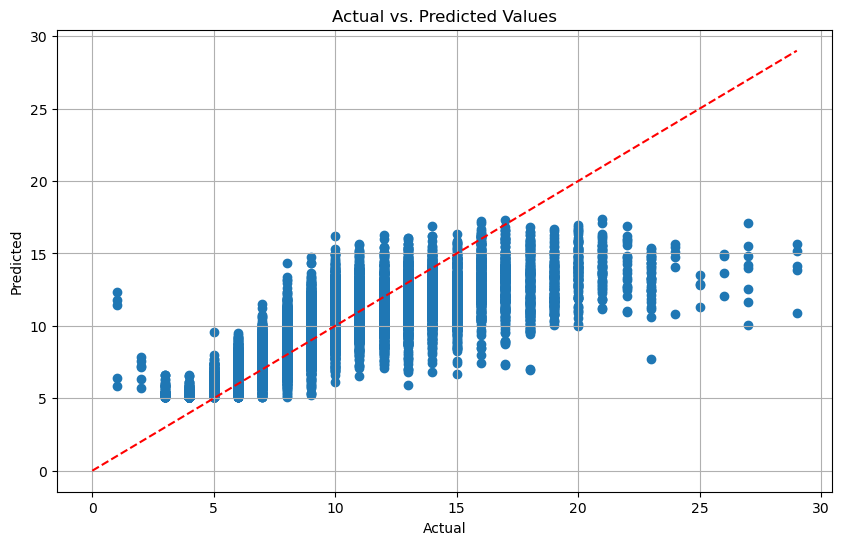

In [8]:
comparison_df = pd.DataFrame({'Actual': y_val, 'Predicted': predictions})
show(comparison_df)

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.plot([0, max(comparison_df['Actual'])], [0, max(comparison_df['Actual'])], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Inspect feature importances

Shell weight      50.213709
Whole weight.1    26.824971
Height             7.625302
Whole weight       4.007075
Sex                3.349619
Length             2.936818
Whole weight.2     2.701016
Diameter           2.341489
dtype: float64

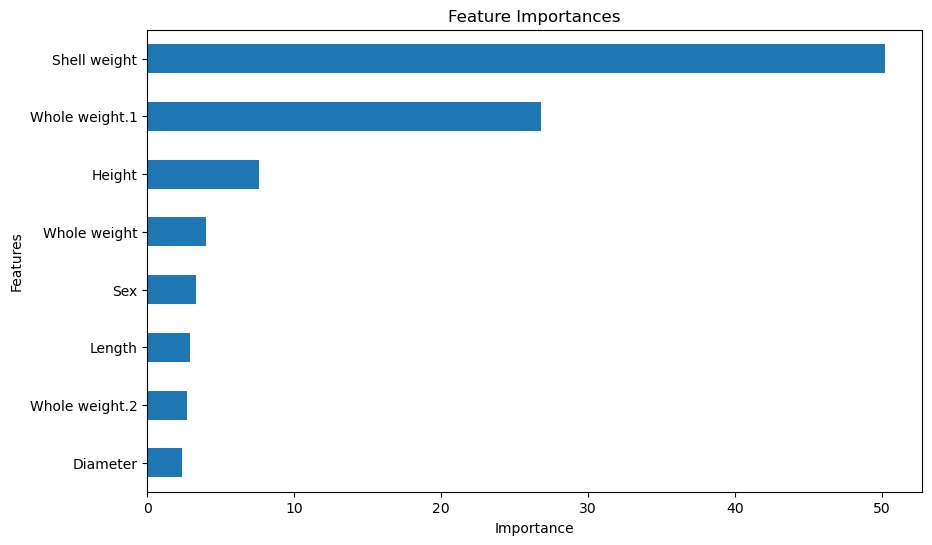

In [9]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
display(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10,6))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

# Submission

In [10]:
# Drop id column for predictions
df_test_drop = df_test.drop('id', axis=1)
show(df_test_drop)

# Make predictions on the test data
test_predictions = model.predict(df_test_drop)

# Format is 'id' and predicted 'Rings' values
submission_df = pd.DataFrame({'id': df_test['id'], 'Rings': test_predictions})
show(submission_df)

# Save the DataFrame to a CSV file
submission_df.to_csv('../data/processed/cb-submission.csv', index=False)